# Modeling 1D Air Resistance with Linear and Quadratic Models

In [75]:
# Import libraries
import pandas as pd
import math
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import statistics

In [76]:
# Constants
gravitational_acceleration = -3  # m/s^2
mass = 0.0036  # kg

In [77]:
# Model Linear and Quadratic Air Resistance
def model(name, times, positions, velocities):
    # Calculate accelerations
    accelerations = [0]
    for i in range(len(times) - 1):
        accelerations.append((velocities[i + 1] - velocities[i]) / (times[i + 1] - times[i]))

    # Define linear and quadratic model evaluation functions
    def linear_eval(velocities, coefficient):
        linear_accelerations = [gravitational_acceleration - coefficient * velocity / mass for velocity in velocities]
        linear_velocities = [0]
        linear_positions = [positions[0]]
        for i in range(len(velocities) - 1):
            linear_velocities.append(linear_velocities[i] + linear_accelerations[i + 1] * (times[i + 1] - times[i]))
            linear_positions.append(linear_positions[i] + linear_velocities[i + 1] * (times[i + 1] - times[i]))
        return linear_positions

    def quadratic_eval(velocities, coefficient):
        quadratic_accelerations = [gravitational_acceleration + coefficient * velocity ** 2 / mass for velocity in
                                   velocities]
        quadratic_velocities = [0]
        quadratic_positions = [positions[0]]
        for i in range(len(velocities) - 1):
            quadratic_velocities.append(
                quadratic_velocities[i] + quadratic_accelerations[i + 1] * (times[i + 1] - times[i]))
            quadratic_positions.append(quadratic_positions[i] + quadratic_velocities[i + 1] * (times[i + 1] - times[i]))
        return quadratic_positions

    # Curve fit linear and quadratic models
    linear_coefficient, linear_cov = curve_fit(linear_eval, velocities, positions)
    quadratic_coefficient, quadratic_cov = curve_fit(quadratic_eval, velocities, positions)

    print(f"Linear Coefficient: {linear_coefficient[0]}, Linear Covariance: {linear_cov}")
    print(f"Quadratic Coefficient: {quadratic_coefficient[0]}, Quadratic Covariance: {quadratic_cov}")

    # Model 1D motion with air resistance
    def linear_model(linear_times, coefficient):
        linear_accelerations = [0]
        linear_velocities = [0]
        linear_positions = [positions[0]]
        for i in range(len(linear_times) - 1):
            linear_accelerations.append(gravitational_acceleration - coefficient * linear_velocities[i] / mass)
            linear_velocities.append(
                linear_velocities[i] + linear_accelerations[i + 1] * (linear_times[i + 1] - linear_times[i]))
            linear_positions.append(
                linear_positions[i] + linear_velocities[i + 1] * (linear_times[i + 1] - linear_times[i]))
        return linear_accelerations, linear_velocities, linear_positions

    def quadratic_model(quadratic_times, coefficient):
        quadratic_accelerations = [0]
        quadratic_velocities = [0]
        quadratic_positions = [positions[0]]
        for i in range(len(quadratic_times) - 1):
            quadratic_accelerations.append(gravitational_acceleration + coefficient * quadratic_velocities[
                i] ** 2 / mass)
            quadratic_velocities.append(quadratic_velocities[i] + quadratic_accelerations[i + 1] * (
                    quadratic_times[i + 1] - quadratic_times[i]))
            quadratic_positions.append(
                quadratic_positions[i] + quadratic_velocities[i + 1] * (quadratic_times[i + 1] - quadratic_times[i]))
        return quadratic_accelerations, quadratic_velocities, quadratic_positions

    model_times = np.linspace(times[0], times[len(times) - 1], 100000)
    linear_accelerations, linear_velocities, linear_positions = linear_model(model_times, linear_coefficient[0])
    quadratic_accelerations, quadratic_velocities, quadratic_positions = quadratic_model(model_times,
                                                                                         quadratic_coefficient[0])

    # Plot data and models
    plt.plot(times, positions)
    plt.plot(model_times, linear_positions)
    plt.plot(model_times, quadratic_positions)
    plt.title("Position (m) vs. Time (s)")
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.legend(["Data", "Linear Model", "Quadratic Model"])
    plt.savefig(f"{name}.png", dpi=300)
    plt.show()

    return linear_coefficient[0], quadratic_coefficient[0], linear_cov[0][0], quadratic_cov[0][0]

Gravitational Acceleration: -3 m/s^2

Linear Coefficient: 0.009441339760584424, Linear Covariance: [[4.4683337e-09]]
Quadratic Coefficient: 0.010830591781407536, Quadratic Covariance: [[3.83691755e-08]]


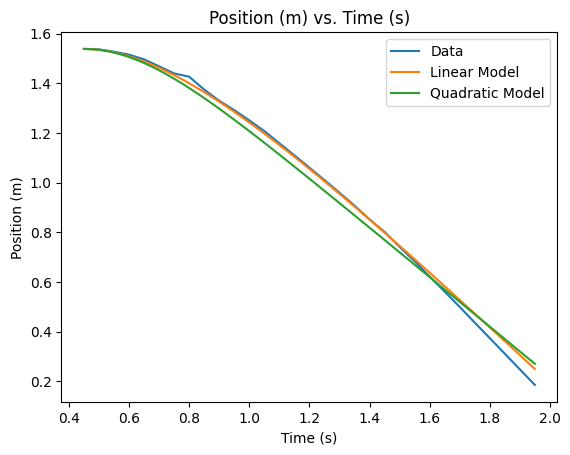

Linear Coefficient: 0.009344919932379962, Linear Covariance: [[7.83886384e-09]]
Quadratic Coefficient: 0.00823928285615104, Quadratic Covariance: [[1.41760623e-09]]


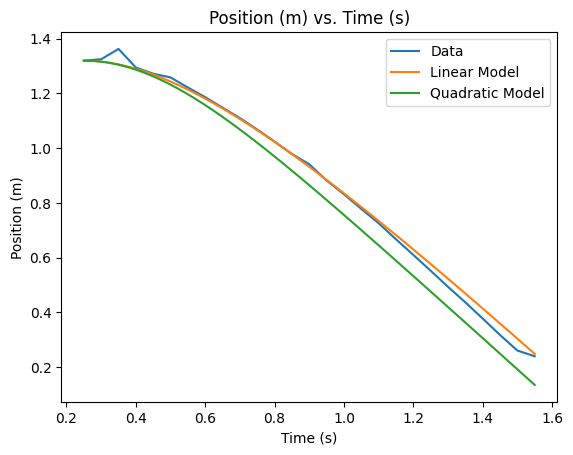

Linear Coefficient: 0.007925678494393823, Linear Covariance: [[1.58580952e-09]]
Quadratic Coefficient: 0.009663854638868801, Quadratic Covariance: [[1.0367787e-08]]


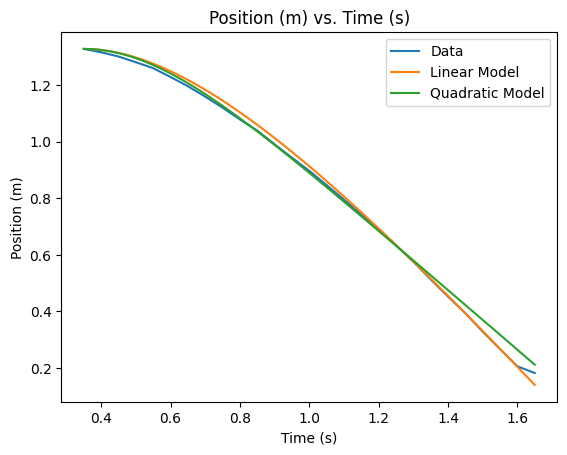

Linear Coefficient: 0.007911254951056365, Linear Covariance: [[4.63650027e-09]]
Quadratic Coefficient: 0.009735383642058079, Quadratic Covariance: [[3.23175929e-09]]


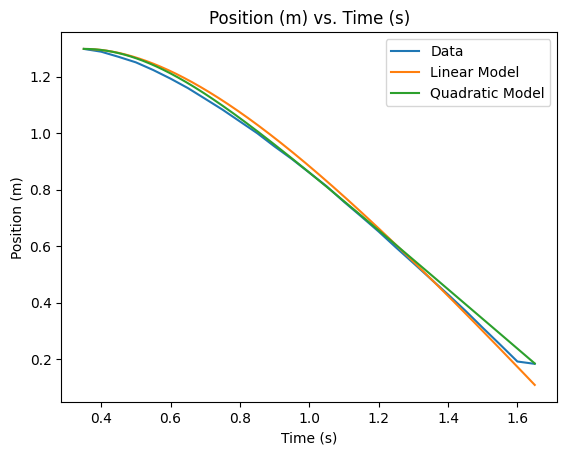

Linear Coefficient: 0.011390674355646486, Linear Covariance: [[2.93258456e-08]]
Quadratic Coefficient: 0.013865620825883258, Quadratic Covariance: [[1.51006574e-07]]


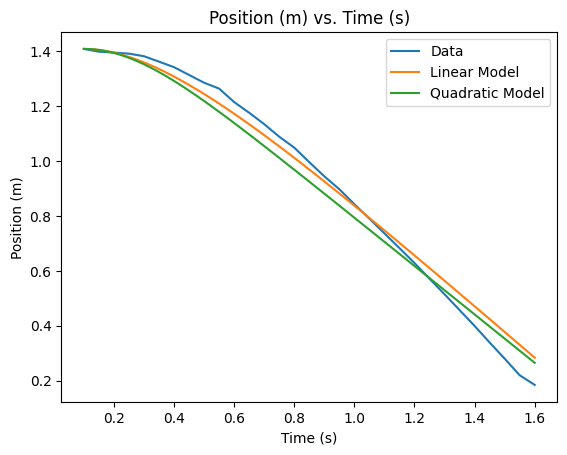

Average Linear Coefficient: 0.009202773498812211, Average Linear Covariance: 9.571070591211305e-09
Average Quadratic Coefficient: 0.010466946748873742, Average Quadratic Covariance: 4.0878580483863915e-08


In [78]:
print(f"Gravitational Acceleration: {gravitational_acceleration} m/s^2\n")
data1 = pd.read_csv("Sensor1.csv")
linear_coefficient_1, quadratic_coefficient_1, linear_cov_1, quadratic_cov1 = model("Sensor1",
                                                                                    data1["Time (s)"],
                                                                                    data1["Position (m)"],
                                                                                    data1["Velocity (m/s)"])
data2 = pd.read_csv("Sensor2.csv")
linear_coefficient_2, quadratic_coefficient_2, linear_cov_2, quadratic_cov2 = model("Sensor2",
                                                                                    data2["Time (s)"],
                                                                                    data2["Position (m)"],
                                                                                    data2["Velocity (m/s)"])
data3 = pd.read_csv("Sensor3.csv")
linear_coefficient_3, quadratic_coefficient_3, linear_cov_3, quadratic_cov3 = model("Sensor3",
                                                                                    data3["Time (s)"],
                                                                                    data3["Position (m)"],
                                                                                    data3["Velocity (m/s)"])
data4 = pd.read_csv("Sensor4.csv")
linear_coefficient_4, quadratic_coefficient_4, linear_cov_4, quadratic_cov4 = model("Sensor4",
                                                                                    data4["Time (s)"],
                                                                                    data4["Position (m)"],
                                                                                    data4["Velocity (m/s)"])
data5 = pd.read_csv("Sensor5.csv")
linear_coefficient_5, quadratic_coefficient_5, linear_cov_5, quadratic_cov5 = model("Sensor5",
                                                                                    data5["Time (s)"],
                                                                                    data5["Position (m)"],
                                                                                    data5["Velocity (m/s)"])
print(f"Average Linear Coefficient: {statistics.mean([linear_coefficient_1, linear_coefficient_2, linear_coefficient_3, linear_coefficient_4, linear_coefficient_5])}, Average Linear Covariance: {statistics.mean([linear_cov_1, linear_cov_2, linear_cov_3, linear_cov_4, linear_cov_5])}")
print(f"Average Quadratic Coefficient: {statistics.mean([quadratic_coefficient_1, quadratic_coefficient_2, quadratic_coefficient_3, quadratic_coefficient_4, quadratic_coefficient_5])}, Average Quadratic Covariance: {statistics.mean([quadratic_cov1, quadratic_cov2, quadratic_cov3, quadratic_cov4, quadratic_cov5])}")